[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/neuropucp/lab-book/book/blob/master/codigoEDA.ipynb)

# Análisis de señales EDA

Instalamos los paquetes necesarios:

In [ ]:
!pip install neurokit2

Para este tutorial usaremos datos EDA extraidos con el sistema Nuanic:

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/neuropucp/lab-book/refs/heads/main/res/nuanic-sample.csv")
df = df[df.eda.isin([r"\N"]) == False]
df["eda"] = pd.to_numeric(df["eda"])
df

Visualizamos los datos:

<Axes: xlabel='time_unix', ylabel='eda'>

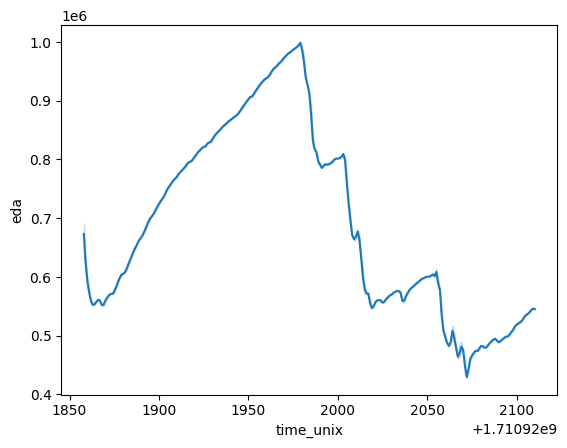

In [ ]:
import seaborn as sns

sns.lineplot(x="time_unix", y="eda", data=df)

Ejecutamos el pipeline básico de Neurokit 2 para preprocesar (`eda_process`) y visualizar (`eda_plot`) EDA:

/home/renato/.virtualenvs/eeg/lib/python3.12/site-packages/neurokit2/eda/eda_clean.py:105: NeuroKitWarning: EDA signal is sampled at very low frequency. Skipping filtering.
  warn(


,SCR_Peaks_N,SCR_Peaks_Amplitude_Mean,EDA_Tonic_SD,EDA_Sympathetic,EDA_SympatheticN,EDA_Autocorrelation
0,16.0,26755.845126,160554.02827,1.616763e+08,0.001971,0.972385


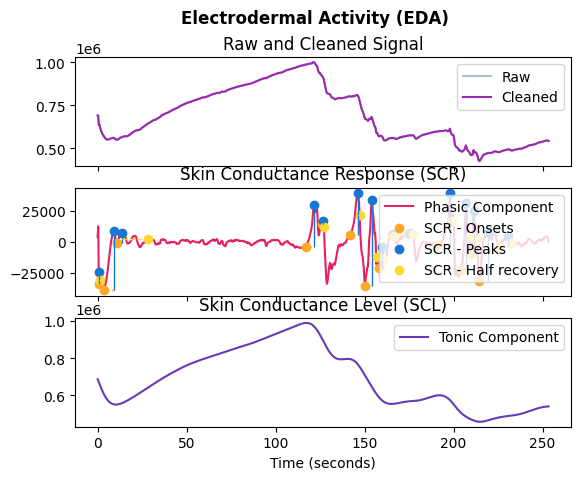

In [ ]:
import neurokit2 as nk

eda_signal = df.eda
signals, info = nk.eda_process(eda_signal, sampling_rate=3, method="neurokit")
nk.eda_plot(signals, info)

Y podemos calcular métricas relevantes de la señal con las función `eda_analyze`:

In [ ]:
analyze_df = nk.eda_analyze(signals, sampling_rate=3, method="interval-related")
analyze_df

,SCR_Peaks_N,SCR_Peaks_Amplitude_Mean,EDA_Tonic_SD,EDA_Sympathetic,EDA_SympatheticN,EDA_Autocorrelation
0,16.0,26755.845126,160554.02827,1.616763e+08,0.001971,0.972385
